In [3]:
# Do pracy z macierzami i wielowymiarowymi tablicami
import numpy as np

# Do budowania modelu
import tensorflow as tf

# Do wizualizacji
import matplotlib.pyplot as plt

# Do przetwarzania obrazu i uczenia maszynowego
import cv2

# TensorFlow zawiera dostawcę danych dla MNIST, z którego będziemy korzystać
import tensorflow_datasets as tfds

# Wczytanie danych MNIST
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

# Oblicz ilość próbek walidacyjnych
num_validation_samples = int(0.1 * mnist_info.splits['train'].num_examples)
num_test_samples = int(mnist_info.splits['test'].num_examples)

# Funkcja skalująca dane wejściowe (0-1)
def scale(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Zastosowanie skalowania do zbiorów danych
scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

# Bufor do tasowania danych
BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

# Podział na dane walidacyjne i treningowe
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

# Określenie rozmiaru partii
BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(BATCH_SIZE)  # poprawka: nie grupuj walidacji w jednej partii
test_data = test_data.batch(BATCH_SIZE)              # poprawka: test też w mniejszych partiach

# Tworzenie modelu
input_size = 784  # 28x28 pikseli
output_size = 10  # 10 cyfr
hidden_layer_size = 50

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Ilość epok i wczesne zatrzymanie
NUM_EPOCHS = 30
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# Trenowanie modelu
model.fit(train_data,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
          validation_data=validation_data,
          verbose=1)

# Ewaluacja na danych testowych
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {:.2f}. Test accuracy: {:.2f}%'.format(test_loss, test_accuracy * 100.))


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.FB56WZ_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.FB56WZ_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7940 - loss: 0.7311 - val_accuracy: 0.9377 - val_loss: 0.2123
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9453 - loss: 0.1844 - val_accuracy: 0.9622 - val_loss: 0.1359
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9595 - loss: 0.1373 - val_accuracy: 0.9623 - val_loss: 0.1211
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9665 - loss: 0.1120 - val_accuracy: 0.9697 - val_loss: 0.1068
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9722 - loss: 0.0922 - val_accuracy: 0.9748 - val_loss: 0.0862
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9764 - loss: 0.0776 - val_accuracy: 0.9737 - val_loss: 0.0881
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9793 - loss: 0.0661 - val_accuracy: 0.9782 - val_loss: 0.0683
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9801 - loss: 0.0633 - val_accuracy: 0.9757 - v

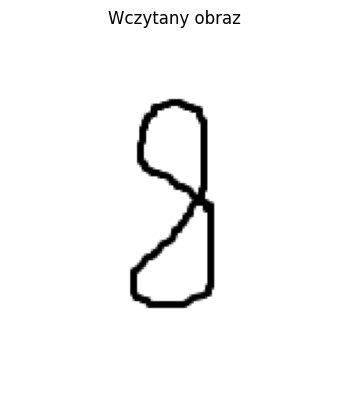

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Model rozpoznał cyfrę jako: 8


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Wczytaj obraz w skali szarości (ścieżka względna lub absolutna)
img_path = 'cyfra.png'  # <-- Podaj nazwę pliku (umieść go w tym samym katalogu co notebook)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Wyświetl wczytany obraz
plt.imshow(img, cmap='gray')
plt.title("Wczytany obraz")
plt.axis('off')
plt.show()

# Przeskaluj obraz do rozmiaru 28x28 (jeśli nie jest już taki)
img_resized = cv2.resize(img, (28, 28))

# Odwrócenie kolorów (czarne tło, biała cyfra – tak jak w MNIST)
img_inverted = 255 - img_resized

# Normalizacja i kształtowanie danych: [1, 28, 28, 1]
img_normalized = img_inverted.astype('float32') / 255.0
img_input = np.expand_dims(img_normalized, axis=(0, -1))  # dodaj batch i kanał

# Przewidzenie etykiety
prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print("Model rozpoznał cyfrę jako:", predicted_label)
